<a href="https://colab.research.google.com/github/sudharshanreddy4567/ANN_Deeplearning/blob/main/dataScalingipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import files

In [4]:
upload=files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [29]:
data=pd.read_csv('Social_Network_Ads.csv')

In [7]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [16]:
print(data.columns.tolist())

['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']


In [20]:
data.columns=data.columns.str.strip()
data.colomns=data.columns.str.replace('\t','',regex=True)

<ipython-input-20-2d86d3524cf2>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.colomns=data.columns.str.replace('\t','',regex=True)


In [23]:
data.drop(['User ID', 'Gender'], axis=1, inplace=True)


In [24]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [25]:
d=data.head(5)

In [27]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [30]:
df=data.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [32]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

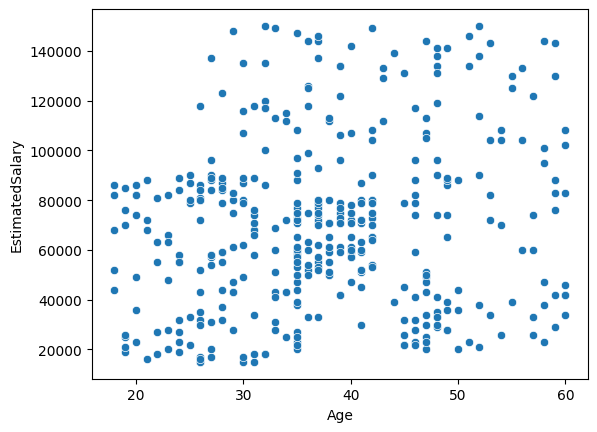

In [34]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [36]:
X=df.iloc[:,0:2]
Y=df.iloc[:,-1]

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import Sequential
from keras.layers import Dense

In [39]:
model=Sequential()

In [41]:
model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
history=model.fit(X_train_scaled,Y_train,validation_data=(X_test_scaled,Y_test),epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.6726 - loss: 0.6690 - val_accuracy: 0.6000 - val_loss: 0.6527
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6643 - loss: 0.5936 - val_accuracy: 0.6250 - val_loss: 0.5557
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6880 - loss: 0.5488 - val_accuracy: 0.7625 - val_loss: 0.4734
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7733 - loss: 0.4473 - val_accuracy: 0.7750 - val_loss: 0.4112
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8414 - loss: 0.3611 - val_accuracy: 0.8000 - val_loss: 0.3724
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8582 - loss: 0.3274 - val_accuracy: 0.8000 - val_loss: 0.3543
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8759 - loss: 0.3195 - val_accuracy: 0.8125 - val_loss: 0.3429
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8690 - loss: 0.3222 - val_accuracy: 0.8250 

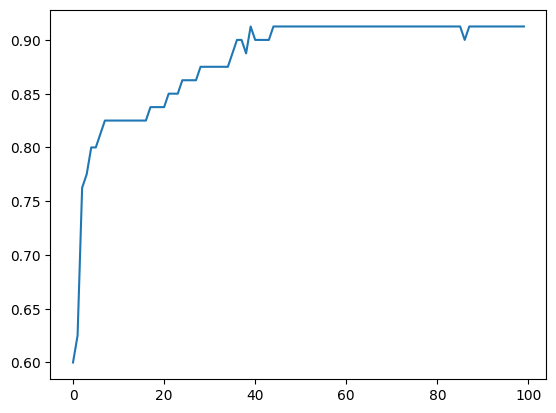

In [60]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [56]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [51]:
X_train_scaled

array([[-0.74651519,  0.33929263],
       [-1.48154554, -1.59952242],
       [-0.01148485, -0.52883351],
       [-0.74651519,  0.10779233],
       [ 1.55045463, -0.03689536],
       [ 0.90730308, -1.48377227],
       [-1.29778795,  0.3103551 ],
       [-0.83839399, -1.13652181],
       [ 0.26415153, -0.32627074],
       [-0.10336364,  1.58360677],
       [-1.20590916, -1.39695965],
       [-1.38966674, -1.2812095 ],
       [-0.47087881,  1.32316893],
       [ 0.7235455 ,  0.22354248],
       [-0.19524244, -0.35520828],
       [-0.37900002, -0.81820889],
       [-1.66530312, -0.03689536],
       [ 2.10172739, -0.84714643],
       [ 1.45857584,  0.02097972],
       [-1.02215157, -0.81820889],
       [-0.01148485,  0.19460494],
       [ 0.7235455 , -0.76033381],
       [-0.6546364 , -0.26839567],
       [-0.10336364, -1.10758427],
       [-1.11403037,  0.25248002],
       [ 0.7235455 , -1.13652181],
       [ 0.7235455 , -1.42589719],
       [ 0.26415153, -0.41308336],
       [ 0.6316667 ,

<Axes: >

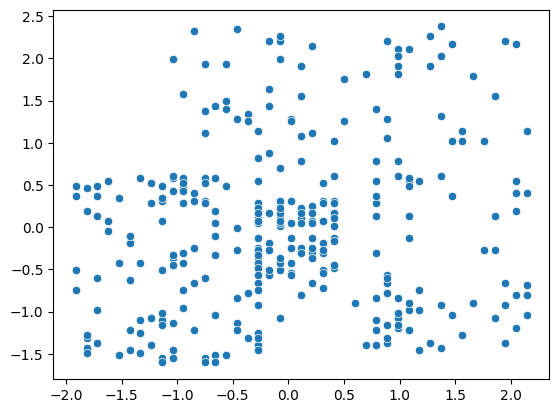

In [57]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])